# Snapshot Ptychography on Array-cameras: demo
#### Chengyu  Wang, University of Arizona

This notebook is the demo of the experimental results in:

Wang, Chengyu, Minghao Hu, Yuzuru Takashima, Timothy J. Schulz, and David J. Brady. "Snapshot Ptychography on Array-cameras."

In [1]:
import torch
import numpy as np
import cv2
import matplotlib.pyplot as plt
from ReconNet_model_max import ReconNet

In [2]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [3]:
def run_the_sample(x,num_measure = 16):
    
    '''
    Args:
        x: Measurements
        num_measure: Number of measurements used to reconstruct image. 
    '''
    
    ## load model
    if num_measure == 16:
        model = ReconNet(num_input_feature = 16)
        model.load_state_dict(torch.load('./model_dict/16measure_with_difficult.pt'))
    elif num_measure == 12:
        model = ReconNet(num_input_feature = 12)
        model.load_state_dict(torch.load('./model_dict/12measure.pt'))
    elif num_measure == 4:
        model = ReconNet(num_input_feature = 4)
        model.load_state_dict(torch.load('./model_dict/4measure.pt'))
    else:
        raise ValueError("Invalid number of measurements. Must be 4, 12 or 16.")
    model.to(device)
    model.eval()
    
    ## run the network
    options = {4 : [6,7,10,11], 12 : [0,1,2,3,4,5,8,9,12,13,14,15],16: range(16)}
    with torch.no_grad():
        est = model(torch.tensor(np.expand_dims(x[options[num_measure],:,:],axis=0)).to(device))
        
    return(est.detach().cpu().numpy()[0,0,:,:])

In [4]:
def run_and_plot(x,y,num_measure):
    im = run_the_sample(x,num_measure)
    fig = plt.figure(figsize=(20,10))
    ax1 = fig.add_subplot(1,4,1)
    ax1.imshow(im,vmin=0,vmax=1,cmap='gray')
    plt.title('Network output',y=-0.1)
    plt.axis('off')
    ax1 = fig.add_subplot(1,4,2)
    ax1.imshow(np.round(im),vmin=0,vmax=1,cmap='gray')
    plt.title('Reconstruction',y=-0.1)
    plt.axis('off')
    ax1 = fig.add_subplot(1,4,3)
    ax1.imshow(y,cmap='gray')
    plt.title('Groundtruth',y=-0.1)
    plt.axis('off')
    ax1 = fig.add_subplot(1,4,4)
    ax1.imshow(cv2.resize(y,(120,90),interpolation=cv2.INTER_CUBIC),cmap='gray')
    plt.title('Down-sampled',y=-0.1)
    plt.axis('off')
    plt.tight_layout()
    plt.show()

### Load a sample

In [5]:
x = np.load('data_sample/sample1_measure.npy')
y = cv2.imread('data_sample/sample1.png',0)
print(x.shape,y.shape)

(16, 576, 768) (576, 768)


### Visualize the measurments

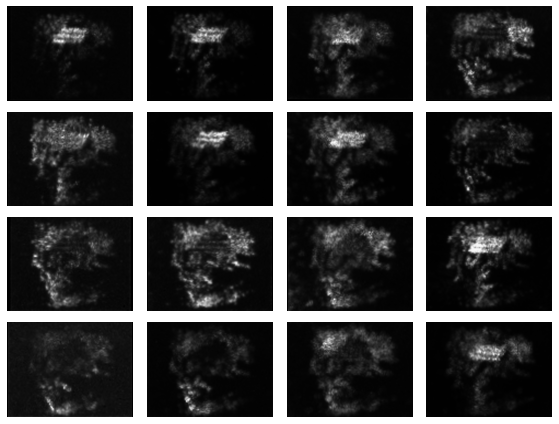

In [6]:
fig = plt.figure(figsize=(8,6))
for i in range(16):
    ax1 = fig.add_subplot(4,4,i + 1)
    ax1.imshow(x[i,:,:],vmin = 0.06,cmap='gray')
    plt.axis('off')
    plt.tight_layout()

### Visualize the reconstruction

16 measurements:


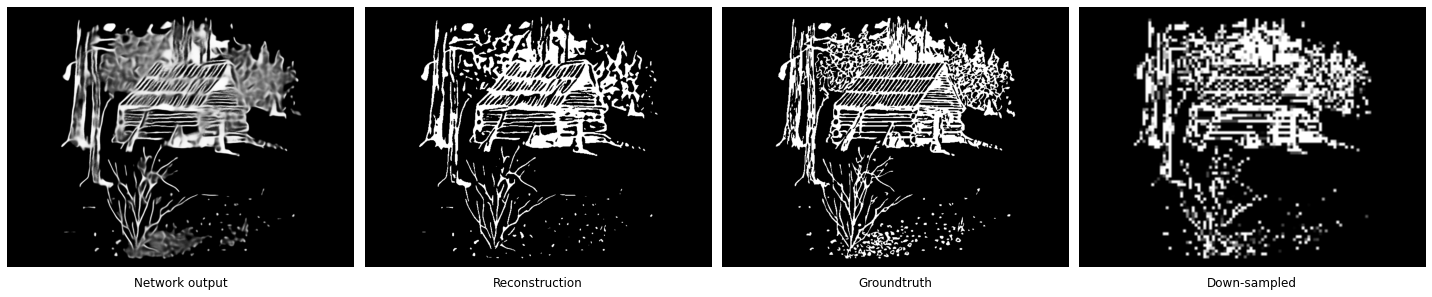

12 measurements:


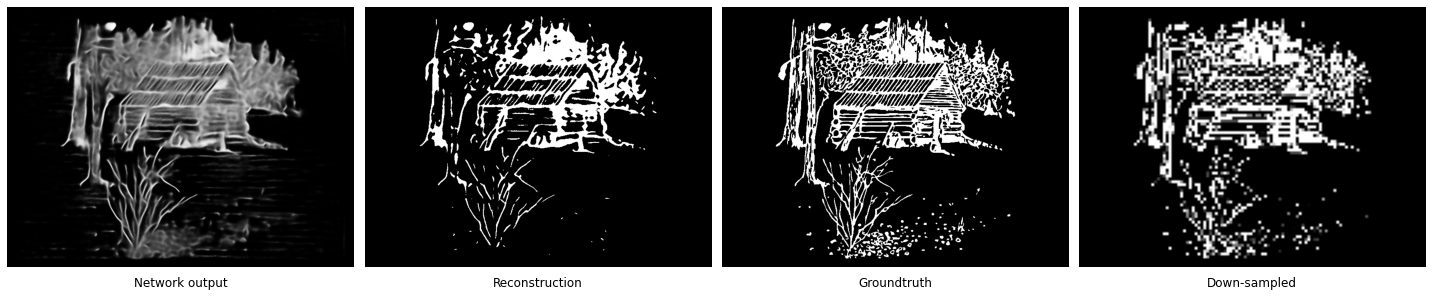

4 measurements:


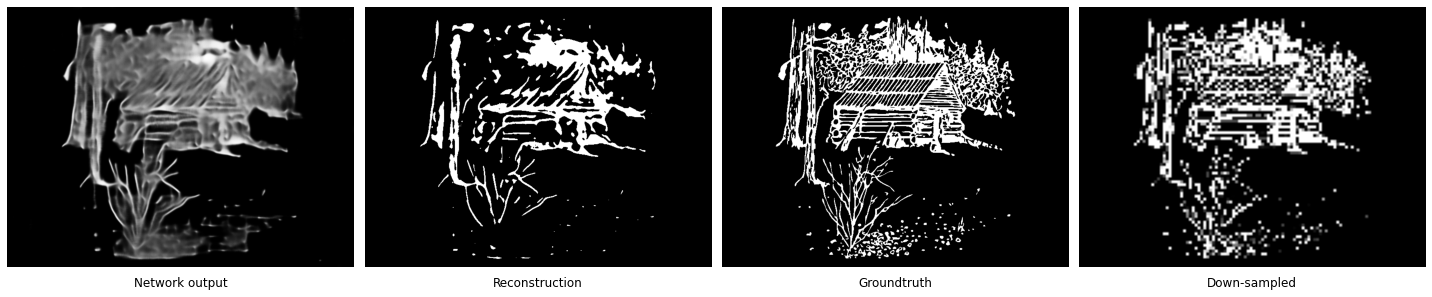

In [7]:
print('16 measurements:');run_and_plot(x,y,16)
print('12 measurements:');run_and_plot(x,y,12)
print('4 measurements:');run_and_plot(x,y,4)